In [ ]:
from tensorflow import keras

(train_data, train_target),(test_data, test_target)= keras.datasets.fashion_mnist.load_data()
train_data.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
(train_data, train_target),(test_data, test_target)= keras.datasets.cifar10.load_data()
train_data.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
import numpy as np


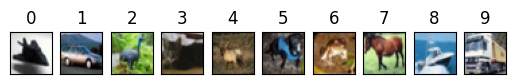

In [ ]:
import matplotlib.pyplot as plt
for id, index in enumerate([np.where(train_target == i)[0][0] for i in range(10)]):
  plt.subplot(1,10,id+1)
  plt.title(id)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data[index])
plt.show()

# 컬러 이미제에 대한 신경망 구현

In [ ]:
# 데이터 표준화
train_data = train_data / 255.0  # 이미지의 픽셀의 유효범위가 0 ~255 0 ~ 1
test_data = test_data / 255.0
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32,32,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,train_target,epochs=10,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1028 - val_loss: 2.3026
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0999 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3024
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1033 - loss: 2.3024 - val_accuracy: 0.1014 - val_loss: 2.3021
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1127 - loss: 2.3020 - val_accuracy: 0.0912 - val_loss: 2.3014
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.1100 - loss: 2.3012 - val_accuracy: 0.1011 - val_loss: 2.3000
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1153 - loss: 2.2996 - val_accuracy: 0.1608 - val_loss: 2.2978
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.1383 - loss: 2.2973 - val_accuracy: 0.1558 - val_loss: 2.2949
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1428 - loss: 2.2941 - val_acc

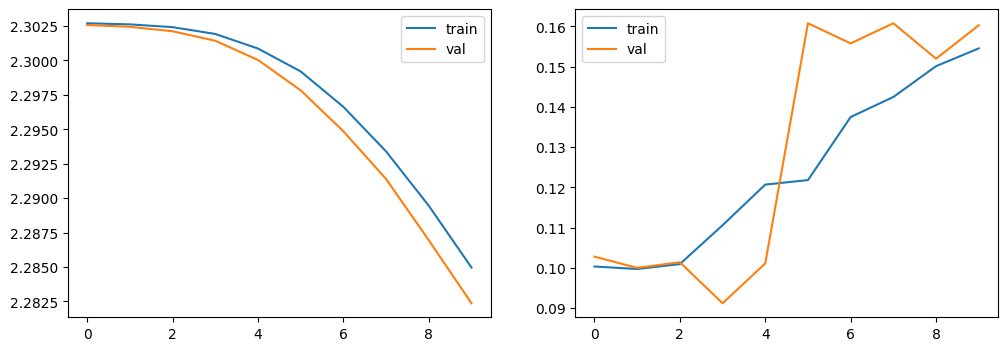

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# 추론(예측)

In [ ]:
np.argmax(model.predict(test_data[:5]), axis=1) # predcit는 각 라벨의 확률이 나옴. 그래서 np.argmax를 사용하여 가장 높은 값을 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([4, 8, 8, 8, 6])

In [ ]:
print(model.evaluate(test_data,test_target))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1674 - loss: 2.2820
[2.2823662757873535, 0.16030000150203705]


In [ ]:
from tensorflow import keras
(train_data,train_target),(test_data, test_target) =  keras.datasets.cifar10.load_data()
train_data = train_data / 255.0  # 이미지의 픽셀의 유효범위가 0 ~ 255  0 ~ 1
test_data = test_data / 255.0
# conv2d 레이어를 추가
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32,32,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))  # 30,30,32
model.add(keras.layers.MaxPool2D())  # 15,15,32  # stride를 주지 않으면 폴링사이즈와 같은 크기로 동작
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))  # 30,30,32
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# FC, 분류기, 다층신경망
model.add(keras.layers.Flatten())  # 입력데이터를 1차원으로   15*15*32 = 7200
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,train_target,epochs=10,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 214ms/step - accuracy: 0.3022 - loss: 1.8911 - val_accuracy: 0.4874 - val_loss: 1.3964
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 197ms/step - accuracy: 0.5183 - loss: 1.3506 - val_accuracy: 0.5705 - val_loss: 1.2087
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 196ms/step - accuracy: 0.5827 - loss: 1.1843 - val_accuracy: 0.6104 - val_loss: 1.0997
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 202ms/step - accuracy: 0.6211 - loss: 1.0804 - val_accuracy: 0.5993 - val_loss: 1.1333
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 206ms/step - accuracy: 0.6532 - loss: 0.9965 - val_accuracy: 0.6576 - val_loss: 0.9827
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 198ms/step - accuracy: 0.6790 - loss: 0.9195 - val_accuracy: 0.6633 - val_loss: 0.9589
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 185ms/step - accuracy: 0.6921 - loss: 0.8794 - val_accuracy: 0.6776 - val_loss: 0.9213
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - accuracy: 0.7095 - loss: 

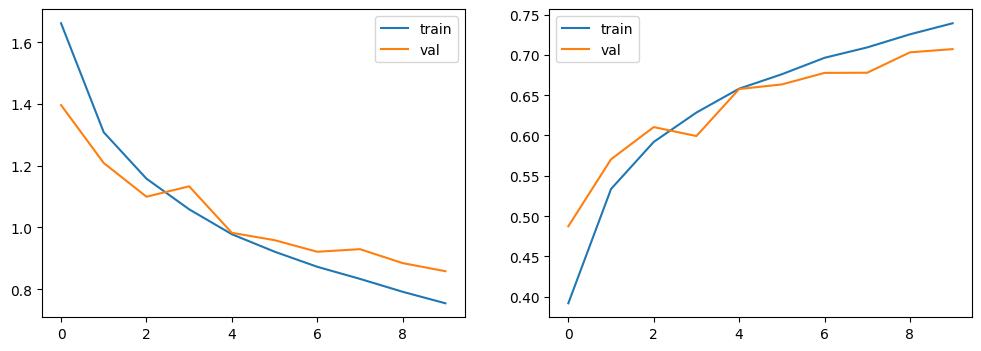

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

In [ ]:
input = keras.layers.Input(shape=(32,32,3))
hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(input)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(64,activation='relu')(hidden)
output = keras.layers.Dense(10,activation='softmax')(hidden)
model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model_api.fit(train_data,train_target,epochs=2,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 204ms/step - accuracy: 0.3021 - loss: 1.8755 - val_accuracy: 0.4975 - val_loss: 1.4084
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 195ms/step - accuracy: 0.5166 - loss: 1.3414 - val_accuracy: 0.5641 - val_loss: 1.2309


In [ ]:
conv_act1 = keras.models.Model(model_api.input, model_api.layers[1].output)
conv_act2 = keras.models.Model(model_api.input, model_api.layers[3].output)
conv_act3 = keras.models.Model(model_api.input, model_api.layers[5].output)

conv_output1 = conv_act1.predict(test_data[:1])
conv_output2 = conv_act2.predict(test_data[:1])
conv_output3 = conv_act3.predict(test_data[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


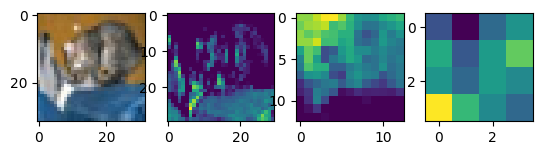

In [ ]:
plt.subplot(1,4,1)
plt.imshow(test_data[0])
plt.subplot(1,4,2)
plt.imshow(conv_output1[0,:,:,12])
plt.subplot(1,4,3)
plt.imshow(conv_output2[0,:,:,12])
plt.subplot(1,4,4)
plt.imshow(conv_output3[0,:,:,12])

# 정리...
```
신경망 Tensroflow
  입력층
  히든층 : 모델을 사용할때 외부에 입력과 출력만 노출이되서
  그 사이 층은 hidden layers
  출력층

모델 구성
1. Sequence([
  layers...
  layers...
]}
2. model = Sequnece()
model.add(layers....)
3. api
  input = keras.layers.Input()
  hidden = keras.layers......(input)
  hidden = keras.layers......(hidden)
  ....
  output = keras.layers......(hidden)
  model = Model(input,output)
    장점..
      중간레이어의 출력값을 다로 빼서 새로운 모델을 만들수 있고
      중간레이어 이후에 사용자가 따로만든 레이어를 합쳐서 새로운 모델 만들수 있다---> 전이학습(기존모델활용)
```

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
list(data_dir.glob('*/*.*'))

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/LICENSE.txt')]

In [ ]:
from glob import glob
flowers = glob(str(data_dir)+'/**/*.jpg', recursive=True)
flowers[:5]

['/root/.keras/datasets/flower_photos/flower_photos/daisy/8619103877_d8c82c5f34_n.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/2331133004_582772d58f_m.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/5577555349_2e8490259b.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/16737503507_431768a927.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/7358085448_b317d11cd5.jpg']

array([[[137, 120, 104],
        [136, 119, 103],
        [143, 126, 110],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[129, 112,  96],
        [129, 112,  96],
        [134, 117, 101],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[124, 107,  91],
        [126, 109,  93],
        [130, 113,  97],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[104, 106,   5],
        [ 99, 101,   0],
        [ 92,  97,   0],
        ...,
        [ 87,  94,   1],
        [ 86,  93,   0],
        [ 86,  93,   0]],

       [[111, 114,  11],
        [102, 104,   3],
        [ 93,  95,   0],
        ...,
        [ 87,  94,   1],
        [ 86,  93,   0],
        [ 86,  93,   0]],

       [[117, 115,  14],
        [106, 106,   6],
        [ 97,  99,   2],
        ...,
        [ 86,  93,   0],
        [ 86,  93,   0],
        [ 86,  93,   0]]], dtype=uint8)
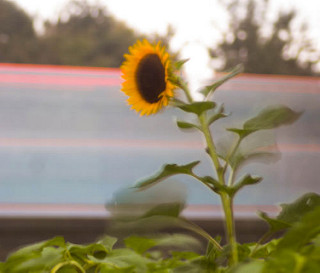

In [ ]:
import numpy as np
import PIL
a = PIL.Image.open(flowers[1000])
np.array(a)

In [ ]:
!pip install opencv-python
import cv2
img = cv2.imread(flowers[20])    # 이미지 읽기(수치화)
img = cv2.resize(img,(100,100))  # 사이즈 조정
img = img.flatten() / 255.0      #  0 ~ 1 스케일링

In [ ]:
# class의 개수
class_names = np.unique([i.split('/')[-2].strip() for i in flowers])
class_count = len(class_names)
print(class_names, class_count)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips'] 5


In [ ]:
# refactoring이 필요한 코드...
from tqdm import tqdm
datas = []
labels = []
for path in tqdm(flowers):
  if path.split('/')[-2] == 'daisy':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(0)
  elif path.split('/')[-2] == 'dandelion':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(1)
  elif path.split('/')[-2] == 'roses':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(2)
  elif path.split('/')[-2] == 'sunflowers':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(3)
  elif path.split('/')[-2] == 'tulips':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(4)
datas = np.array(datas)
labels = np.array(labels)

100%|██████████| 3670/3670 [00:05<00:00, 712.15it/s]


In [ ]:
datas = datas / 255.0

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.Rescaling(1./255)(input)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(input)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜qor함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=3,monitor='val_loss')

history = model_api.fit(datas_train,labels_train,epochs=100,batch_size=64,
                        validation_data=(datas_test,labels_test),
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.2352 - loss: 82.9671 - val_accuracy: 0.2929 - val_loss: 1.5751 - learning_rate: 0.0010
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.2805 - loss: 1.5847 - val_accuracy: 0.3188 - val_loss: 1.4592 - learning_rate: 0.0010
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3370 - loss: 1.4812 - val_accuracy: 0.3583 - val_loss: 1.4412 - learning_rate: 0.0010
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3212 - loss: 1.4761 - val_accuracy: 0.3488 - val_loss: 1.4516 - learning_rate: 0.0010
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3534 - loss: 1.4131 - val_accuracy: 0.4060 - val_loss: 1.3768 - learning_rate: 0.0010
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4148 - loss: 1.3422 - val_accuracy: 0.3801 - val_loss: 1.3886 - learning_rate: 0.0010
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4102 - loss: 1.314

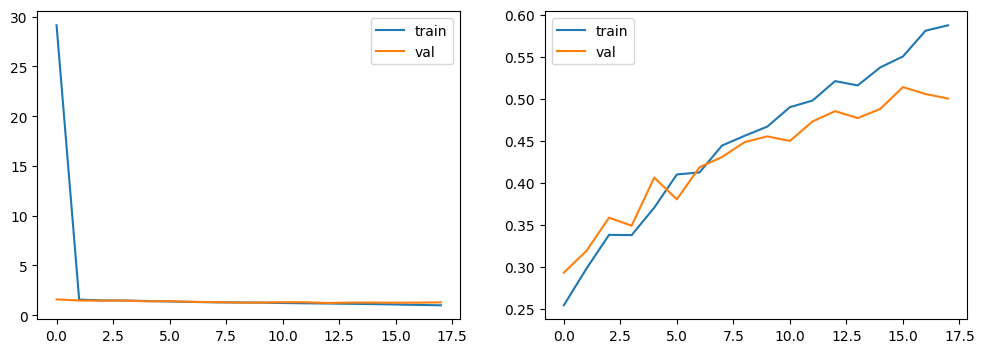

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# 데이터를 폴더형태로 읽어서 학습과 검증 데이터 및 정답을 데이터세트로 만들기

# 성능개선을 하는 방법 ( 이미지 더 많이 확보)

In [ ]:
# 데이터 증강
data_agumentation = keras.Sequential([
  keras.layers.Input(shape=(100,100,3))  ,
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.1),
  keras.layers.RandomZoom(0.1),
])

array([[[ 62, 117,  92],
        [ 63, 118,  93],
        [ 64, 118,  95],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 62, 116,  93],
        [ 64, 118,  94],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 61, 114,  95],
        [ 64, 118,  94],
        ...,
        [ 62, 117,  94],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       ...,

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]]], dtype=uint8)
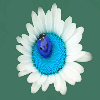

In [ ]:
datas[0]

(100, 100, 3) (1, 100, 100, 3)


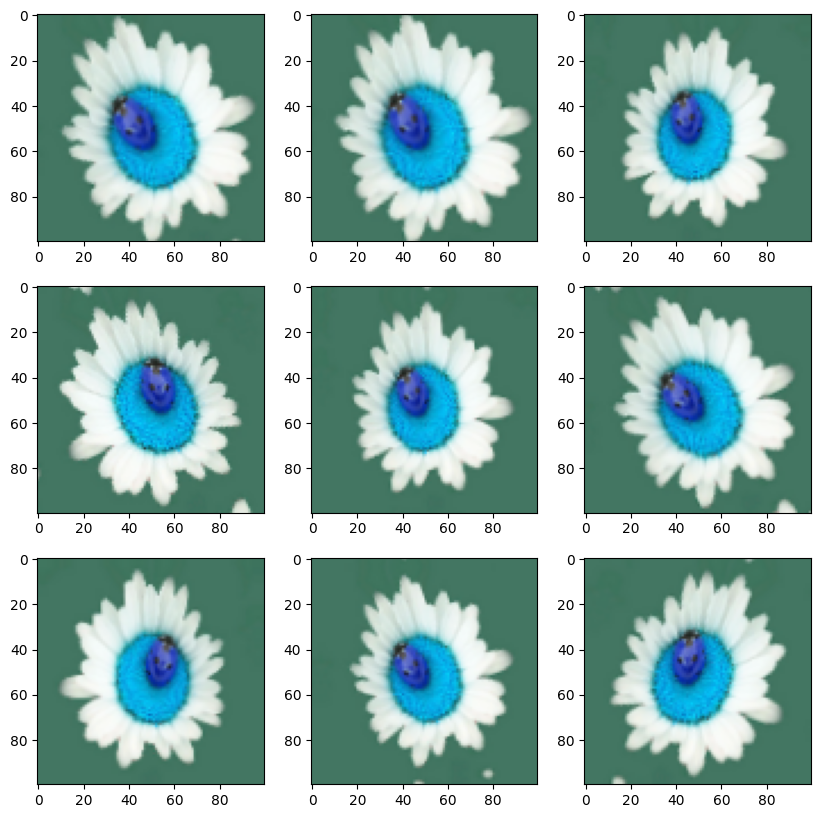

In [ ]:
print(datas[0].shape, datas[:1].shape)
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  agumented_images =  data_agumentation(datas[:1])  # 100 100 3  -> 1 100 100 3
  # 계산과정에서 픽셀의 값이 255를 초과하는 실수 값이 나올수 있으므로 정수로 변환한다
  img = agumented_images[0].numpy().astype('uint8')
  plt.imshow(img)

plt.show()

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
# 데이터 증강
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.RandomFlip('horizontal')(input)
hidden = keras.layers.RandomRotation(0.1)(hidden)
hidden = keras.layers.RandomZoom(0.1)(hidden)

hidden = keras.layers.Rescaling(1./255)(hidden)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_7 (RandomFlip)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_7 (RandomRotation)   │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_6 (RandomZoom)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=8,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=4,monitor='val_loss')

history = model_api.fit(datas_train,labels_train,epochs=100,batch_size=128,
                        validation_data=(datas_test,labels_test),
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.2544 - loss: 1.8299 - val_accuracy: 0.3283 - val_loss: 1.4600 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3679 - loss: 1.3986 - val_accuracy: 0.3774 - val_loss: 1.4390 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4542 - loss: 1.2283 - val_accuracy: 0.4905 - val_loss: 1.2257 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4951 - loss: 1.1830 - val_accuracy: 0.5218 - val_loss: 1.2120 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5109 - loss: 1.1556 - val_accuracy: 0.4755 - val_loss: 1.2619 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5204 - loss: 1.1292 - val_accuracy: 0.5436 - val_loss: 1.1656 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5702 - loss: 1.0546 - 

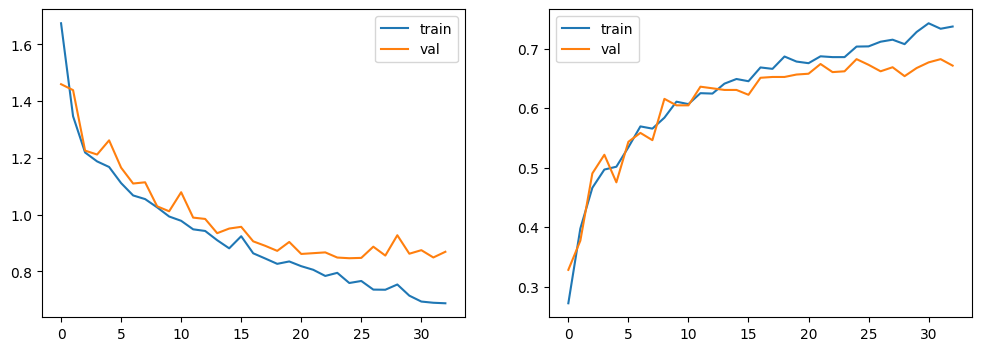

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# 데이터를 폴더형태로 읽어서 학습과 검증 데이터 및 정답을 데이터세트로 만들기

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    str(data_dir)+'/flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(100, 100),  # resize
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    str(data_dir)+'/flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(100, 100),  # resize
    batch_size=32)
train_ds.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
# 데이터 증강
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.RandomFlip('horizontal')(input)
hidden = keras.layers.RandomRotation(0.1)(hidden)
hidden = keras.layers.RandomZoom(0.1)(hidden)

hidden = keras.layers.Rescaling(1./255)(hidden)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_9 (RandomFlip)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_9 (RandomRotation)   │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_8 (RandomZoom)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_9 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=8,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=4,monitor='val_loss')

history = model_api.fit(train_ds,epochs=100,batch_size=128,
                        validation_data=val_ds,
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.2576 - loss: 1.6649 - val_accuracy: 0.4578 - val_loss: 1.3449 - learning_rate: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.4476 - loss: 1.2924 - val_accuracy: 0.4986 - val_loss: 1.2346 - learning_rate: 0.0010
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5338 - loss: 1.1531 - val_accuracy: 0.5640 - val_loss: 1.1165 - learning_rate: 0.0010
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5861 - loss: 1.0593 - val_accuracy: 0.6049 - val_loss: 1.0474 - learning_rate: 0.0010
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6064 - loss: 1.0155 - val_accuracy: 0.6063 - val_loss: 0.9702 - learning_rate: 0.0010
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6377 - loss: 0.9366 - val_accuracy: 0.6199 - val_loss: 0.9620 - learning_rate: 0.0010
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6437 - loss: 0.9356 -

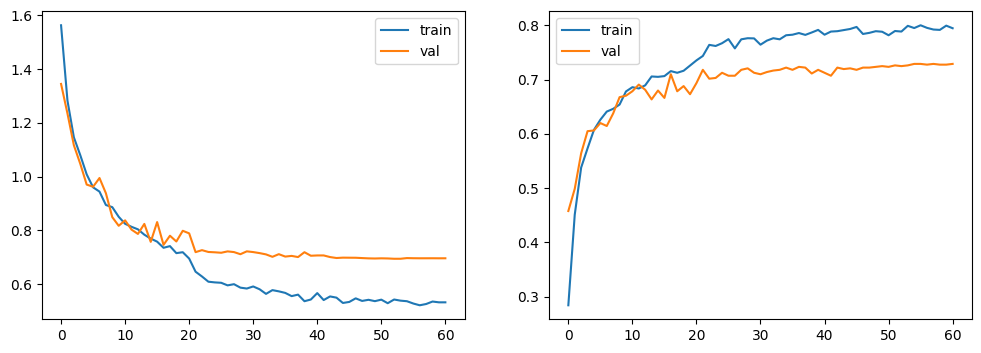

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# auto tunning
```
cache() 데이터셋을 메모리 또는 디스크에 캐싱하여 빠르게 접근 가능
prefetch(buffer_size=AUTOTUNE) GPU가 학습하는동안 CPU가 데이터를 미리 준비
```

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 데이터 증강II